# Install and Import Required Libraries

In [1]:
import numpy as np
import pandas as pd
import random
import warnings
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
warnings.filterwarnings("ignore")
%matplotlib inline

#Modelling
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score

#Logistic Regression
from sklearn import linear_model, decomposition
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix

#K-Nearest Neighbors
from sklearn.neighbors import KNeighborsClassifier

#Support Vector Machine
from sklearn.svm import SVC
from sklearn import svm 

#Decision Tree
from sklearn.tree import DecisionTreeClassifier

#Random Forest
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix

#Naive Bayes
from sklearn.naive_bayes import GaussianNB
from sklearn import metrics


# Data Loading

In [2]:
dataset = "bank-additional-full.csv"
df = pd.read_csv("bank-additional-full.csv", sep=';')

In [3]:
df

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41183,73,retired,married,professional.course,no,yes,no,cellular,nov,fri,...,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,yes
41184,46,blue-collar,married,professional.course,no,no,no,cellular,nov,fri,...,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,no
41185,56,retired,married,university.degree,no,yes,no,cellular,nov,fri,...,2,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,no
41186,44,technician,married,professional.course,no,no,no,cellular,nov,fri,...,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,yes


In [4]:
df.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


In [5]:
df.tail()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
41183,73,retired,married,professional.course,no,yes,no,cellular,nov,fri,...,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,yes
41184,46,blue-collar,married,professional.course,no,no,no,cellular,nov,fri,...,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,no
41185,56,retired,married,university.degree,no,yes,no,cellular,nov,fri,...,2,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,no
41186,44,technician,married,professional.course,no,no,no,cellular,nov,fri,...,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,yes
41187,74,retired,married,professional.course,no,yes,no,cellular,nov,fri,...,3,999,1,failure,-1.1,94.767,-50.8,1.028,4963.6,no


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             41188 non-null  int64  
 1   job             41188 non-null  object 
 2   marital         41188 non-null  object 
 3   education       41188 non-null  object 
 4   default         41188 non-null  object 
 5   housing         41188 non-null  object 
 6   loan            41188 non-null  object 
 7   contact         41188 non-null  object 
 8   month           41188 non-null  object 
 9   day_of_week     41188 non-null  object 
 10  duration        41188 non-null  int64  
 11  campaign        41188 non-null  int64  
 12  pdays           41188 non-null  int64  
 13  previous        41188 non-null  int64  
 14  poutcome        41188 non-null  object 
 15  emp.var.rate    41188 non-null  float64
 16  cons.price.idx  41188 non-null  float64
 17  cons.conf.idx   41188 non-null 

In [7]:
df.shape

(41188, 21)

In [8]:
df.columns.values

array(['age', 'job', 'marital', 'education', 'default', 'housing', 'loan',
       'contact', 'month', 'day_of_week', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome', 'emp.var.rate', 'cons.price.idx',
       'cons.conf.idx', 'euribor3m', 'nr.employed', 'y'], dtype=object)

In [9]:
print(df.dtypes)

age                 int64
job                object
marital            object
education          object
default            object
housing            object
loan               object
contact            object
month              object
day_of_week        object
duration            int64
campaign            int64
pdays               int64
previous            int64
poutcome           object
emp.var.rate      float64
cons.price.idx    float64
cons.conf.idx     float64
euribor3m         float64
nr.employed       float64
y                  object
dtype: object


# Data Pre-Processing

## Membuat barplot untuk variabel perkategori

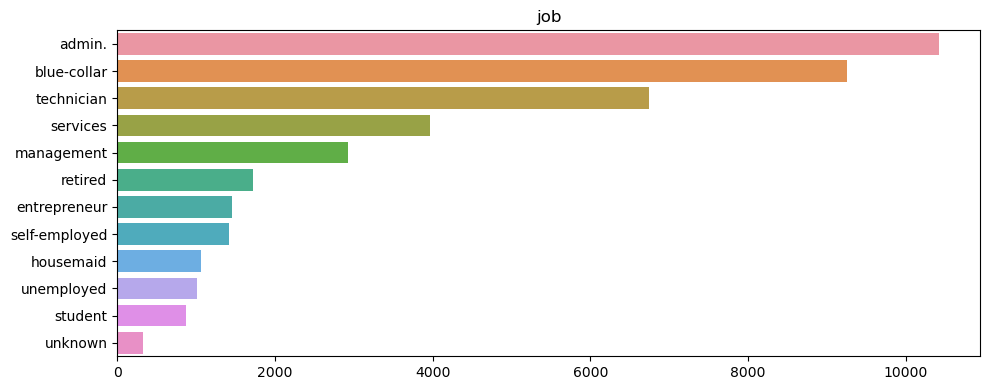

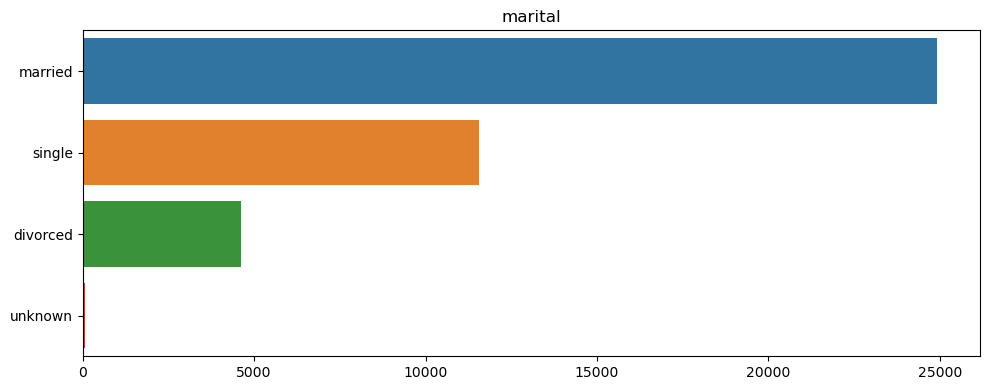

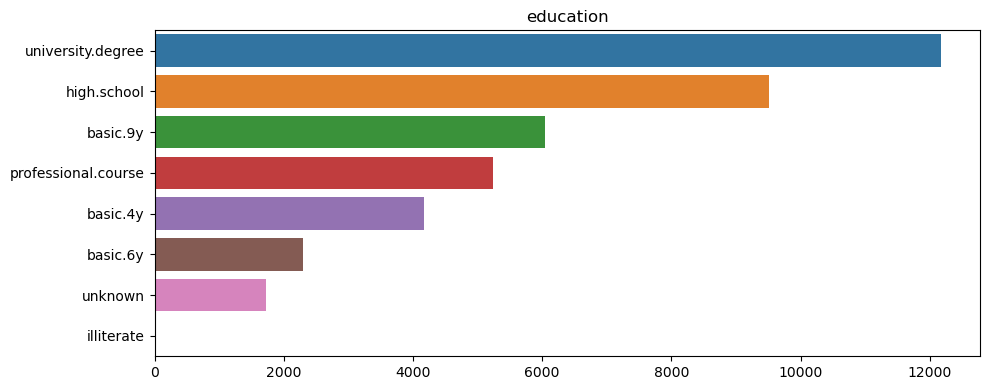

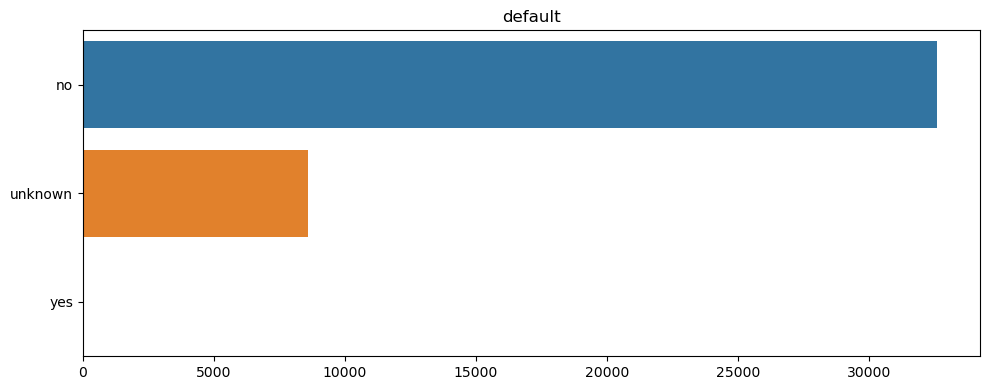

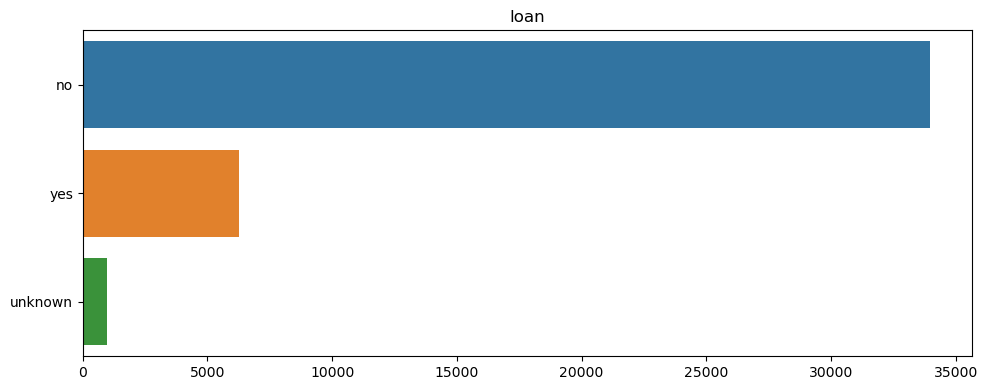

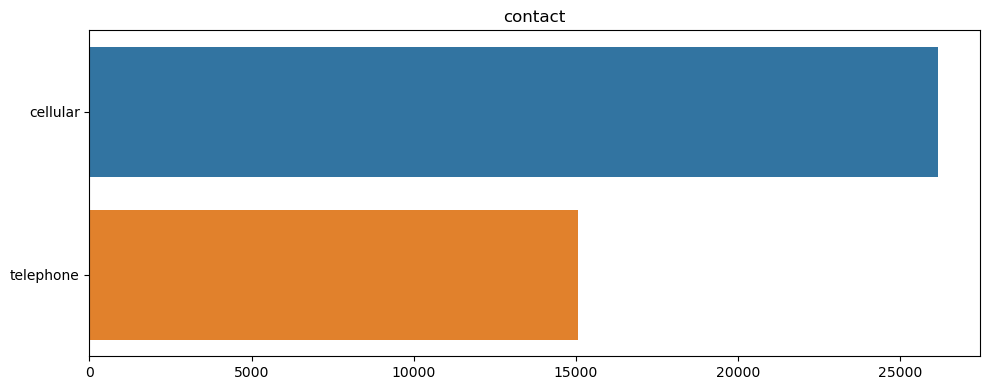

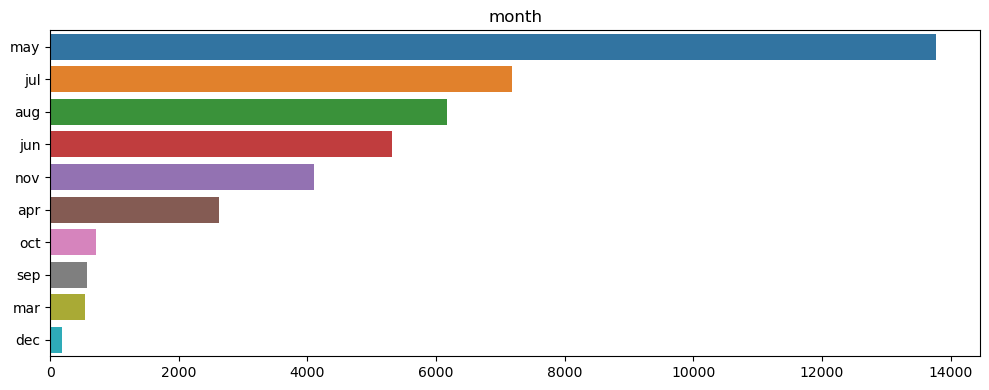

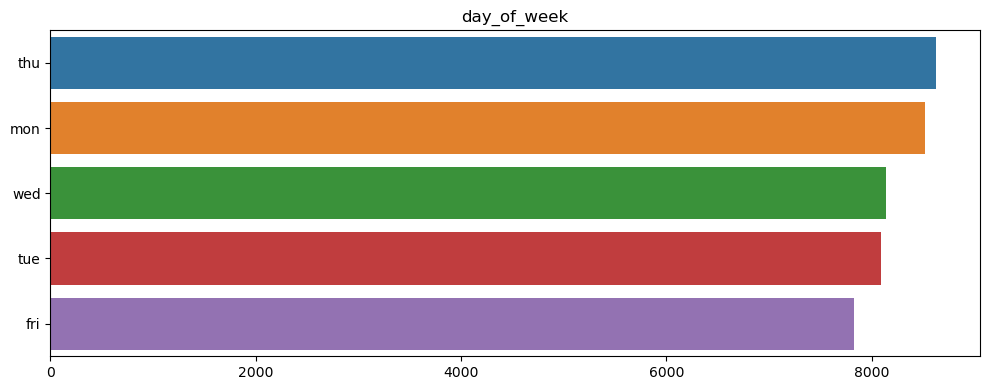

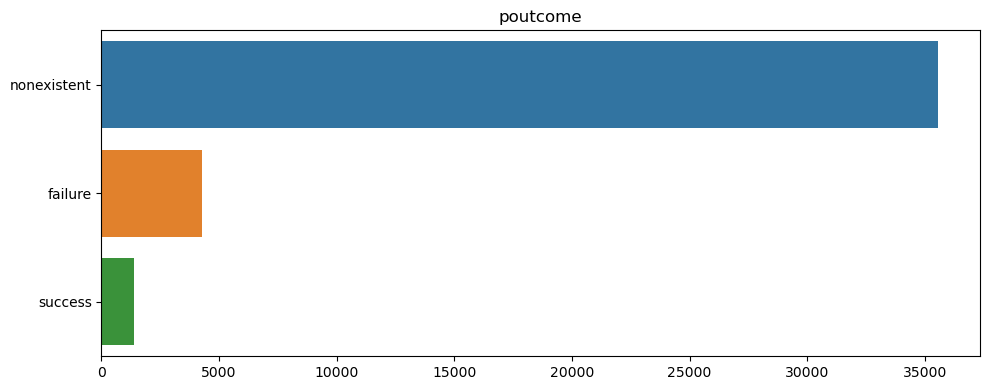

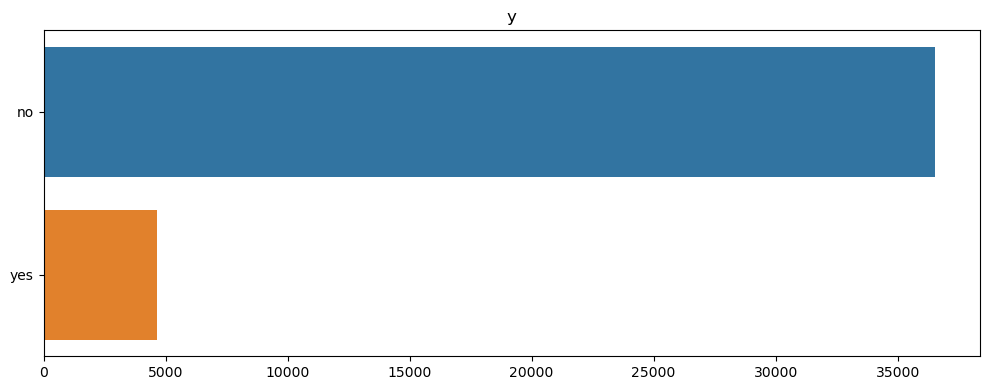

In [10]:
categorcial_variables = ['job', 'marital', 'education', 'default', 'loan', 'contact', 'month', 'day_of_week', 'poutcome','y']
for col in categorcial_variables:
    plt.figure(figsize=(10,4))
    sns.barplot(df[col].value_counts().values, df[col].value_counts().index)
    plt.title(col)
    plt.tight_layout()

## Buat diagram lingkaran untuk variabel target

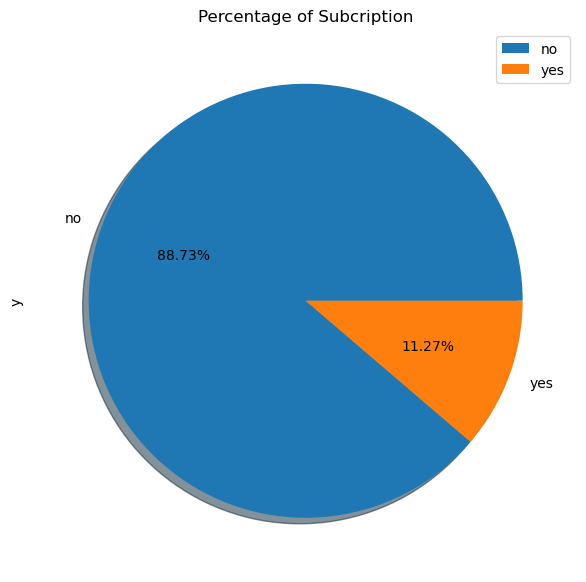

In [11]:
plt.figure(figsize=(7,17))
df['y'].value_counts().plot.pie(shadow=True,autopct='%1.2f%%')
plt.title("Percentage of Subcription")
plt.legend()
plt.show()

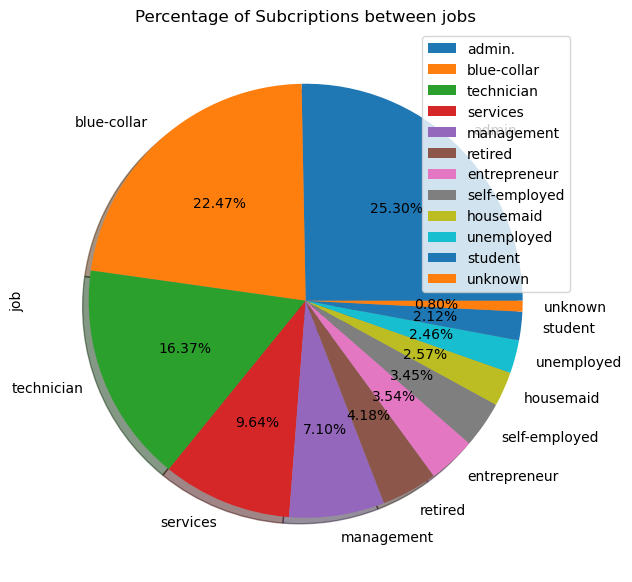

In [12]:
plt.figure(figsize=(7,17))
df['job'].value_counts().plot.pie(shadow=True,autopct='%1.2f%%')
plt.title("Percentage of Subcriptions between jobs")
plt.legend()
plt.show()

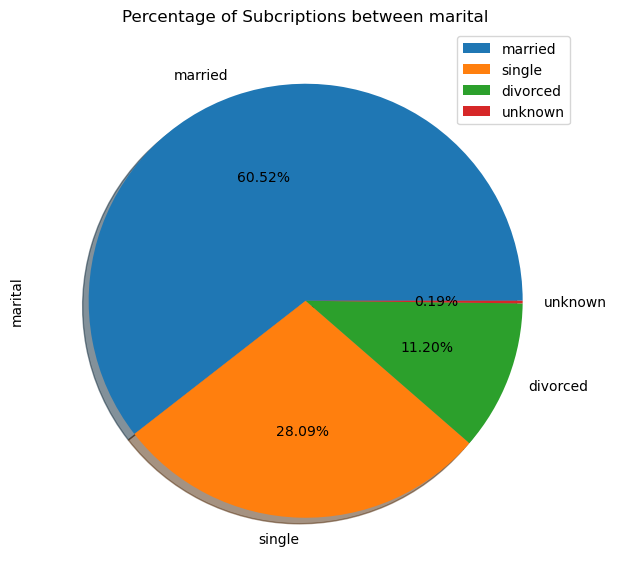

In [13]:
plt.figure(figsize=(7,17))
df['marital'].value_counts().plot.pie(shadow=True,autopct='%1.2f%%')
plt.title("Percentage of Subcriptions between marital")
plt.legend()
plt.show()

### Buat kode def lintas tab untuk EDA

In [14]:
def cross_tab(df,f1,f2):
    jobs=list(df[f1].unique())
    edu=list(df[f2].unique())
    dataframes=[]
    for e in edu:
        dfe=df[df[f2]==e]
        dfejob=dfe.groupby(f1).count()[f2]
        dataframes.append(dfejob)
    xx=pd.concat(dataframes,axis=1)
    xx.columns=edu
    xx=xx.fillna(0)
    return xx

In [15]:
cross_tab(df,'job','education')

,basic.4y,high.school,basic.6y,basic.9y,professional.course,unknown,university.degree,illiterate
job,,,,,,,,
admin.,77,3329,151,499,363,249,5753,1.0
blue-collar,2318,878,1426,3623,453,454,94,8.0
entrepreneur,137,234,71,210,135,57,610,2.0
housemaid,474,174,77,94,59,42,139,1.0
management,100,298,85,166,89,123,2063,0.0
retired,597,276,75,145,241,98,285,3.0
self-employed,93,118,25,220,168,29,765,3.0
services,132,2682,226,388,218,150,173,0.0
student,26,357,13,99,43,167,170,0.0


##### terdapat data 'unknow' maka akan diisi data yang relevan

In [16]:
df.loc[(df['age']>60) & (df['job']=='unknown'), 'job'] = 'retired'
df.loc[(df['education']=='unknown') & (df['job']=='management'), 'education'] = 'university.degree'
df.loc[(df['education']=='unknown') & (df['job']=='services'), 'education'] = 'high.school'
df.loc[(df['education']=='unknown') & (df['job']=='housemaid'), 'education'] = 'basic.4y'
df.loc[(df['job'] == 'unknown') & (df['education']=='basic.4y'), 'job'] = 'blue-collar'
df.loc[(df['job'] == 'unknown') & (df['education']=='basic.6y'), 'job'] = 'blue-collar'
df.loc[(df['job'] == 'unknown') & (df['education']=='basic.9y'), 'job'] = 'blue-collar'
df.loc[(df['job']=='unknown') & (df['education']=='professional.course'), 'job'] = 'technician'

In [17]:
cross_tab(df,'job','education')

,basic.4y,high.school,basic.6y,basic.9y,professional.course,unknown,university.degree,illiterate
job,,,,,,,,
admin.,77.0,3329,151.0,499.0,363.0,249.0,5753,1.0
blue-collar,2366.0,878,1448.0,3654.0,453.0,454.0,94,8.0
entrepreneur,137.0,234,71.0,210.0,135.0,57.0,610,2.0
housemaid,516.0,174,77.0,94.0,59.0,0.0,139,1.0
management,100.0,298,85.0,166.0,89.0,0.0,2186,0.0
retired,601.0,276,75.0,145.0,243.0,112.0,286,3.0
self-employed,93.0,118,25.0,220.0,168.0,29.0,765,3.0
services,132.0,2832,226.0,388.0,218.0,0.0,173,0.0
student,26.0,357,13.0,99.0,43.0,167.0,170,0.0


In [18]:
cross_tab(df,'job','housing')

,no,yes,unknown
job,,,
admin.,4636,5559,227
blue-collar,4362,4752,241
entrepreneur,641,779,36
housemaid,491,540,29
management,1363,1490,71
retired,789,908,44
self-employed,641,740,40
services,1818,2050,101
student,381,471,23


##### data 'unknow' sangat banyak maka akan dihapus

In [19]:
df = df[df.housing != 'unknown']
df = df[df.loan != 'unknown']
df = df[df.default != 'unknown']
df = df[df.job != 'unknown']
df = df[df.marital != 'unknown']
df = df[df.education != 'unknown']

###### data setelah dihapus

In [20]:
df.shape


(30793, 21)

In [21]:
df.drop_duplicates(inplace=True)

In [22]:
numerical_variables = ['age','campaign', 'pdays', 'previous', 'emp.var.rate', 'cons.price.idx','cons.conf.idx','euribor3m',
                      'nr.employed']
df[numerical_variables].describe()

,age,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
count,30783.000000,30783.000000,30783.000000,30783.000000,30783.000000,30783.000000,30783.000000,30783.000000,30783.000000
mean,39.077283,2.520742,956.096287,0.194783,-0.071341,93.524002,-40.592642,3.460800,5160.798343
std,10.352361,2.719635,201.903690,0.524436,1.610917,0.585672,4.789308,1.777185,75.159098
min,17.000000,1.000000,0.000000,0.000000,-3.400000,92.201000,-50.800000,0.634000,4963.600000
25%,31.000000,1.000000,999.000000,0.000000,-1.800000,93.075000,-42.700000,1.313000,5099.100000
50%,37.000000,2.000000,999.000000,0.000000,1.100000,93.444000,-41.800000,4.856000,5191.000000
75%,46.000000,3.000000,999.000000,0.000000,1.400000,93.994000,-36.400000,4.961000,5228.100000
max,95.000000,43.000000,999.000000,7.000000,1.400000,94.767000,-26.900000,5.045000,5228.100000


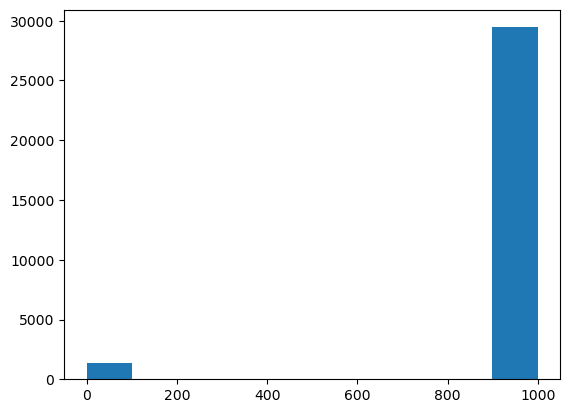

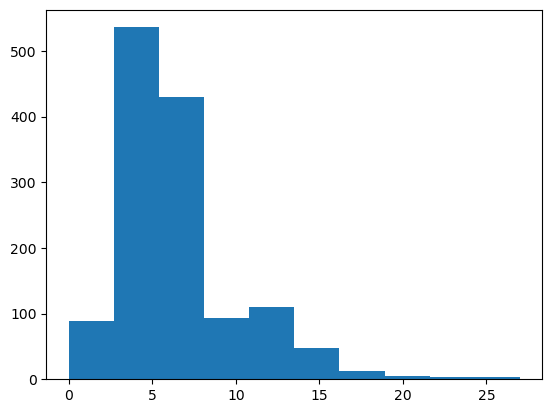

In [23]:
def drawhist(df,feature):
    plt.hist(df[feature])
drawhist(df,'pdays')
plt.show()

plt.hist(df.loc[df.pdays != 999, 'pdays'])
plt.show()

In [24]:
df['pdays_missing'] = 0
df['pdays_less_5'] = 0
df['pdays_greater_15'] = 0
df['pdays_bet_5_15'] = 0
df['pdays_missing'][df['pdays']==999] = 1
df['pdays_less_5'][df['pdays']<5] = 1
df['pdays_greater_15'][(df['pdays']>15) & (df['pdays']<999)] = 1
df['pdays_bet_5_15'][(df['pdays']>=5)&(df['pdays']<=15)]= 1

In [25]:
col = ['duration', 'pdays']
df.drop(col, axis=1,inplace=True)


In [26]:
df.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y,pdays_missing,pdays_less_5,pdays_greater_15,pdays_bet_5_15
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1.1,93.994,-36.4,4.857,5191.0,no,1,0,0,0
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1.1,93.994,-36.4,4.857,5191.0,no,1,0,0,0
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1.1,93.994,-36.4,4.857,5191.0,no,1,0,0,0
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1.1,93.994,-36.4,4.857,5191.0,no,1,0,0,0
6,59,admin.,married,professional.course,no,no,no,telephone,may,mon,...,1.1,93.994,-36.4,4.857,5191.0,no,1,0,0,0


In [27]:
object_cols = ['job','marital','education','default','housing','loan','contact','month','day_of_week','poutcome','y']
label_encoder = LabelEncoder()
for col in object_cols:
    df[col] = label_encoder.fit_transform(df[col])
df.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y,pdays_missing,pdays_less_5,pdays_greater_15,pdays_bet_5_15
0,56,3,1,0,0,0,0,1,6,1,...,1.1,93.994,-36.4,4.857,5191.0,0,1,0,0,0
2,37,7,1,3,0,1,0,1,6,1,...,1.1,93.994,-36.4,4.857,5191.0,0,1,0,0,0
3,40,0,1,1,0,0,0,1,6,1,...,1.1,93.994,-36.4,4.857,5191.0,0,1,0,0,0
4,56,7,1,3,0,0,1,1,6,1,...,1.1,93.994,-36.4,4.857,5191.0,0,1,0,0,0
6,59,0,1,5,0,0,0,1,6,1,...,1.1,93.994,-36.4,4.857,5191.0,0,1,0,0,0


In [28]:
def drawheatmap(df):
    '''Builds the heat map for the given data'''
    f, ax = plt.subplots(figsize=(15, 15))
    sns.heatmap(df.corr(method='spearman'), annot=False, cmap='coolwarm')
    
def drawhist(df,feature):
    '''Draws an histogram for a feature in a data frame (df)'''
    plt.hist(df[feature])

def functionreplace(df,fea,val1,val2):
    '''Replaces value (val1) with value (val2) in the data frame (df) for a feature (fea)'''
    df[fea].replace(val1,val2)
    return df

def drawbarplot(df,x,y):
    '''Draws a bar plot for a given feature x and y in a data frame'''
    sns.barplot(x=x, y=y, data=df)

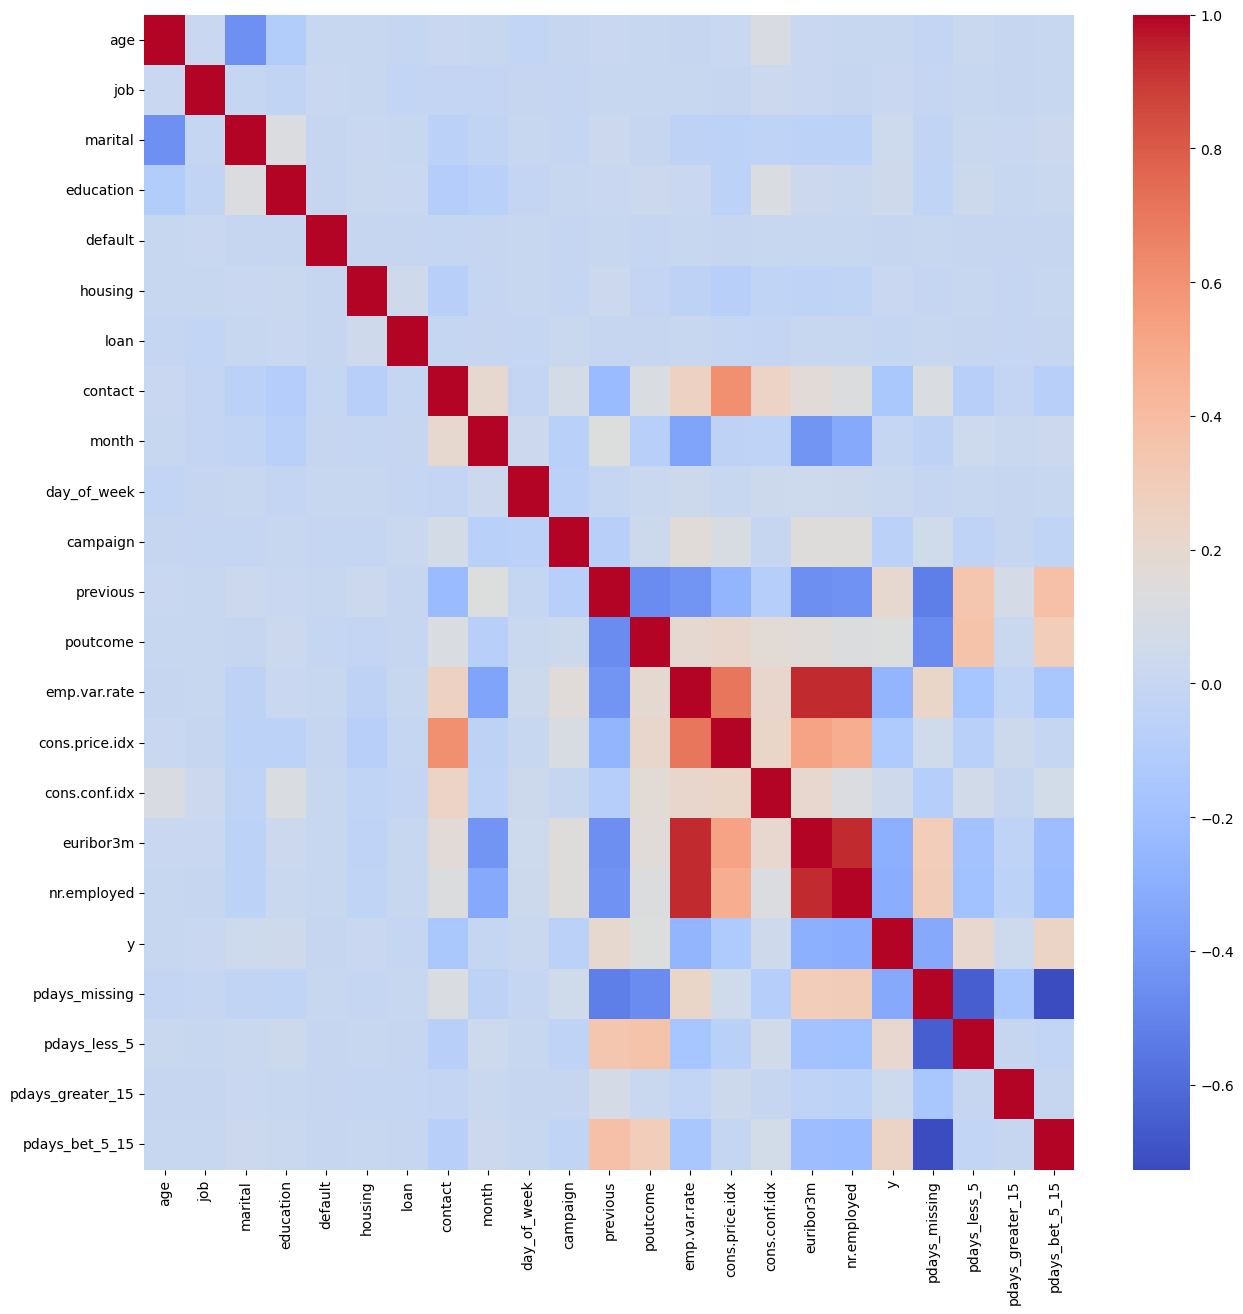

In [29]:
drawheatmap(df)

In [30]:
df_clean = df

# Data Partition

Dataset akan dibagi ke dalam 80% data latih dan 20% data uji.

- Data latih akan digunakan untuk proses tuning parameter dan hyperparameter serta melakukan feature selection
- Data latih akan digunakan untuk melatih model setelah mendapatkan hyperparameter terbaik dengan fitur terbaik hasil seleksi
- Data uji digunakan untuk menguji performa model klasifikasi yang sudah dilatih

In [31]:
##partition data into data training and data testing
train,test = train_test_split(df_clean,test_size = 0.20 ,random_state = 111)
    
##seperating dependent and independent variables on training and testing data
train_X = train.drop(labels='y',axis=1)
train_Y = train['y']
test_X  = test.drop(labels='y',axis=1)
test_Y  = test['y']

In [32]:
# handle imbalance class using oversampling minority class with smote method
os = SMOTE(sampling_strategy='minority',random_state = 123,k_neighbors=5)
train_smote_X,train_smote_Y = os.fit_resample(train_X,train_Y)
train_smote_X = pd.DataFrame(data = train_smote_X,columns=train_X.columns)
train_smote_Y = pd.DataFrame(data = train_smote_Y)

In [75]:
train_X

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,pdays_missing,pdays_less_5,pdays_greater_15,pdays_bet_5_15
25413,33,0,2,3,0,0,0,0,7,3,...,1,-0.1,93.200,-42.0,4.153,5195.8,1,0,0,0
31648,32,0,2,5,0,1,1,0,6,2,...,1,-1.8,92.893,-46.2,1.327,5099.1,1,0,0,0
10472,52,2,0,0,0,0,0,1,4,3,...,1,1.4,94.465,-41.8,4.961,5228.1,1,0,0,0
24349,30,7,2,3,0,0,0,0,7,1,...,1,-0.1,93.200,-42.0,4.191,5195.8,1,0,0,0
30789,34,9,2,5,0,1,0,0,6,3,...,1,-1.8,92.893,-46.2,1.344,5099.1,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11551,45,4,1,6,0,1,0,1,4,0,...,1,1.4,94.465,-41.8,4.959,5228.1,1,0,0,0
6489,33,9,1,2,0,0,0,1,6,4,...,1,1.1,93.994,-36.4,4.857,5191.0,1,0,0,0
7478,50,9,1,5,0,1,0,1,6,0,...,1,1.1,93.994,-36.4,4.864,5191.0,1,0,0,0
15464,51,7,1,0,0,1,0,0,3,0,...,1,1.4,93.918,-42.7,4.957,5228.1,1,0,0,0


In [76]:
train_Y

25413    0
31648    1
10472    0
24349    0
30789    0
        ..
11551    0
6489     0
7478     1
15464    0
18293    0
Name: y, Length: 24626, dtype: int32

In [77]:
test_X

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,pdays_missing,pdays_less_5,pdays_greater_15,pdays_bet_5_15
23854,38,0,1,6,0,1,0,0,1,0,...,1,1.4,93.444,-36.1,4.963,5228.1,1,0,0,0
1661,37,1,1,2,0,1,1,1,6,0,...,1,1.1,93.994,-36.4,4.855,5191.0,1,0,0,0
13749,48,9,1,2,0,0,1,0,3,2,...,1,1.4,93.918,-42.7,4.963,5228.1,1,0,0,0
10386,36,0,2,6,0,1,0,1,4,1,...,1,1.4,94.465,-41.8,4.960,5228.1,1,0,0,0
26532,39,1,1,2,0,0,0,1,7,2,...,0,-0.1,93.200,-42.0,4.076,5195.8,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9477,29,0,2,6,0,1,0,1,4,1,...,1,1.4,94.465,-41.8,4.961,5228.1,1,0,0,0
11247,28,1,1,3,0,0,0,1,4,2,...,1,1.4,94.465,-41.8,4.961,5228.1,1,0,0,0
37030,26,7,2,3,0,1,0,0,3,3,...,1,-2.9,92.469,-33.6,1.044,5076.2,1,0,0,0
9140,50,4,1,6,0,0,0,1,4,0,...,1,1.4,94.465,-41.8,4.967,5228.1,1,0,0,0


In [78]:
test_Y

23854    0
1661     0
13749    1
10386    0
26532    0
        ..
9477     0
11247    0
37030    0
9140     0
464      0
Name: y, Length: 6157, dtype: int32

# Modelling

Tujuan utama data modeling adalah untuk menciptakan metode penyimpanan informasi yang paling efisien, serta menyediakan akses dan pelaporan yang lengkap. pada kali ini akan menggunakan beberapa modelling untuk melihat keakurasian data yaitu :
1. Loogistic Regression
2. KNeighborsClassifier
3. Support Vector Machine
4. Decision TreeDecision 
5. Random Forest
6. Naive Bayes

## Logistic Regression

In [33]:
model = LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=0, solver='liblinear', tol=0.0001, verbose=0,
                   warm_start=False)

In [34]:
model.fit(train_smote_X, train_smote_Y)

LogisticRegression(random_state=0, solver='liblinear')

In [35]:
print(model.intercept_, model.coef_)

[-0.02872251] [[-1.89436738e-02 -1.19395350e-02 -4.73213794e-01 -2.75945117e-02
  -2.36464197e-01 -7.60069882e-01 -1.10939609e+00 -1.68681961e+00
  -1.09497797e-01 -7.80397663e-02 -1.34599403e-01 -1.63984500e+00
  -9.48128947e-01 -9.65951631e-01  9.78642916e-01  5.00757474e-04
   9.92438537e-01 -1.64339193e-02 -6.46563148e+00 -2.12204954e+00
  -2.29387796e+00 -2.64033775e+00]]


In [36]:
pred1 = model.predict(test_X)

In [37]:
confusion_matrix(test_Y, pred1)

array([[4432,  905],
       [ 375,  445]], dtype=int64)

In [38]:
print("Accuracy for Logistic Regression: ",
      accuracy_score(test_Y,pred1))

Accuracy for Logistic Regression:  0.7921065453954849


## KNeighborsClassifier

In [39]:
knn = KNeighborsClassifier()

In [40]:
model2 = KNeighborsClassifier(metric='manhattan',n_neighbors=5, weights='distance')

In [41]:
model2.fit(train_smote_X, train_smote_Y)

KNeighborsClassifier(metric='manhattan', weights='distance')

In [42]:
pred2=model2.predict(test_X)

In [43]:
CF2=confusion_matrix(test_Y, pred2)
CF2

array([[4314, 1023],
       [ 379,  441]], dtype=int64)

In [44]:
print("Accuracy for KNN: ",
      accuracy_score(test_Y,pred2))

Accuracy for KNN:  0.7722917005034919


## Support Vector Machine

In [45]:
esviem = SVC()

In [46]:
clf = svm.SVC(kernel='linear')

In [47]:
clf.fit(train_smote_X,train_smote_Y)

SVC(kernel='linear')

In [48]:
pred3=clf.predict(test_X)

In [49]:
CF3=confusion_matrix(test_Y, pred3)
CF3

array([[5007,  330],
       [ 474,  346]], dtype=int64)

In [51]:
print("Accuracy for SVM: ",
      accuracy_score(test_Y,pred3))

Accuracy for SVM:  0.8694169238265389


## Decision Tree

In [52]:
dec_tree = DecisionTreeClassifier()

In [53]:
grid_param4 = {
    'max_depth': [10,20,100], 
    'criterion': ['gini','entropy']
}

In [54]:
gs4 = GridSearchCV(estimator=dec_tree,
                    param_grid=grid_param4,
                    scoring='accuracy',
                    cv=3)
gs4.fit(train_smote_X,train_smote_Y)
best_parameters4 = gs4.best_params_
print(best_parameters4)


{'criterion': 'entropy', 'max_depth': 100}


In [55]:
model4 = DecisionTreeClassifier(criterion='entropy',max_depth=100)
model4.fit(train_smote_X,train_smote_Y)

DecisionTreeClassifier(criterion='entropy', max_depth=100)

In [56]:
pred4=model4.predict(test_X)

In [57]:
CF4=confusion_matrix(test_Y, pred4)
CF4

array([[4680,  657],
       [ 479,  341]], dtype=int64)

In [58]:
print("Accuracy for Decision Tree: ",
      accuracy_score(test_Y,pred4))

Accuracy for Decision Tree:  0.8154945590384928


## Random Forest

In [59]:
rfc=RandomForestClassifier(random_state=123)

In [61]:
model5 = RandomForestClassifier(criterion='entropy',max_features='auto',n_estimators=1000)
model5.fit(train_smote_X,train_smote_Y)

RandomForestClassifier(criterion='entropy', n_estimators=1000)

In [62]:
# model5 = RandomForestClassifier(criterion='entropy',max_features='auto',n_estimators=1000)
model5.fit(train_smote_X,train_smote_Y)

RandomForestClassifier(criterion='entropy', n_estimators=1000)

In [63]:
pred5=model5.predict(test_X)

In [67]:
CF=confusion_matrix(test_Y, pred5)
CF

array([[4934,  403],
       [ 471,  349]], dtype=int64)

In [68]:
print("Accuracy for Random Forest: ",accuracy_score(test_Y,pred5))

Accuracy for Random Forest:  0.8580477505278544


## Naive Bayes

In [69]:
gnb = GaussianNB()

In [70]:
gnb.fit(train_smote_X, train_smote_Y)

GaussianNB()

In [71]:
pred6 = gnb.predict(test_X)

In [72]:
CF6=confusion_matrix(test_Y, pred6)
CF6

array([[4073, 1264],
       [ 283,  537]], dtype=int64)

In [73]:
print("Accuracy for Naive Bayes:",metrics.accuracy_score(test_Y, pred6))

Accuracy for Naive Bayes: 0.7487412700990742


# Conclusions

In [74]:
print("Accuracy for Logistic Regression: ",
      accuracy_score(test_Y,pred1))
print("Accuracy for KNN: ",
      accuracy_score(test_Y,pred2))
print("Accuracy for SVM: ",
       accuracy_score(test_Y,pred3))
print("Accuracy for Decision Tree: ",
      accuracy_score(test_Y,pred4))
print("Accuracy for Random Forest: ",
      accuracy_score(test_Y,pred5))
print("Accuracy for Naive Bayes:",
      metrics.accuracy_score(test_Y, pred6))

Accuracy for Logistic Regression:  0.7921065453954849
Accuracy for KNN:  0.7722917005034919
Accuracy for SVM:  0.8694169238265389
Accuracy for Decision Tree:  0.8154945590384928
Accuracy for Random Forest:  0.8580477505278544
Accuracy for Naive Bayes: 0.7487412700990742


Kami mendapatkan model akurasi terbaik adalah model Support Vector Machine dengan akurasi tertinggi   0.8694169238265389. Jadi untuk penerapan, saya merekomendasikan untuk menggunakan model SVM Support Vector Machine untuk memprediksi bank pelanggan di masa mendatang.